In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
from glob import glob
import numpy as np
from scipy.io import loadmat
import rasterio as rio
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
from matplotlib import pyplot as plt

C:\Users\Manager\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
#Import Data
S_LISS = glob("C:/Users/Manager/Desktop/Data/26APR_2023/Indices/*.tif")
S_LISS.sort()

In [3]:
print (S_LISS)

['C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\GEMI.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\GNDVI.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\MSAVI.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\MTVI2.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\NDVIre.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\NG.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\NNIR.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\NR.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\SAVI.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\SR.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\VIgreen.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\b1_nt.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\b2_nt.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\b3_nt.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\ndvi.tif', 'C:/Users/Manager/Desktop/Data/26APR_2023/Indices\\ndwi.tif']


In [4]:
l = []
for i in S_LISS:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [5]:
# Data
arr_st = np.stack(l)
arr_st.shape

(16, 7681, 1087)

In [6]:
#Spatial Crossvalidation
import spacv
from spacv.grid_builder import *
from spacv.utils import *
import geopandas as gpd
from sklearn.model_selection import cross_val_score, KFold, GroupKFold
from sklearn.metrics import f1_score, make_scorer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

In [7]:
# Ground Truth
y_data = gpd.read_file('C:/Users/Manager/Desktop/Data/26APR_2023/Sample points/Sample_Points_F10_with_SPCV.shp')
y_data

,OBJECTID,Name_3,b1_nt,b2_nt,b3_nt,NG,NNIR,NR,VIgreen,MTVI2,...,SAVI,SR,ndvi,ndwi,NDVIre,GNDVI,GEMI,spcv,SHAP,geometry
0,1.0,7,0.0594,0.0448,0.0334,0.431686,0.242733,0.325581,0.140115,0.006500,...,-0.029575,0.745536,-0.145780,0.280172,-0.145780,-0.280172,0.202527,1,2,POINT (77.59763 13.11348)
1,2.0,7,0.0582,0.0448,0.0369,0.416011,0.263760,0.320229,0.130097,0.009757,...,-0.020371,0.823661,-0.096695,0.223975,-0.096695,-0.223975,0.211083,1,2,POINT (77.59764 13.11352)
2,3.0,7,0.0619,0.0484,0.0380,0.417397,0.256237,0.326365,0.122393,0.006149,...,-0.026603,0.785124,-0.120370,0.239239,-0.120370,-0.239239,0.211320,1,2,POINT (77.59770 13.11352)
3,4.0,7,0.0619,0.0484,0.0357,0.423973,0.244521,0.331507,0.122393,0.002798,...,-0.032614,0.737603,-0.151011,0.268443,-0.151011,-0.268443,0.205760,1,2,POINT (77.59772 13.11349)
4,5.0,7,0.0607,0.0460,0.0380,0.419489,0.262612,0.317899,0.137769,0.011639,...,-0.020548,0.826087,-0.095238,0.229990,-0.095238,-0.229990,0.212959,1,2,POINT (77.59772 13.11344)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,220.0,4,0.0473,0.0578,0.1315,0.199915,0.555790,0.244294,-0.099905,0.091348,...,0.160380,2.275090,0.389329,-0.470917,0.389329,0.470917,0.405929,5,3,POINT (77.59080 13.39295)
3400,221.0,4,0.0461,0.0590,0.1281,0.197684,0.549314,0.253002,-0.122740,0.080378,...,0.150851,2.171190,0.369321,-0.470723,0.369321,0.470723,0.397919,5,3,POINT (77.59085 13.39295)
3401,222.0,4,0.0461,0.0554,0.1179,0.210119,0.537375,0.252507,-0.091626,0.077135,...,0.139240,2.128160,0.360646,-0.437805,0.360646,0.437805,0.381438,5,3,POINT (77.59085 13.39290)
3402,223.0,4,0.0449,0.0530,0.1213,0.204836,0.553376,0.241788,-0.082738,0.088452,...,0.151935,2.288680,0.391853,-0.459687,0.391853,0.459687,0.390814,5,3,POINT (77.59085 13.39284)


In [324]:
XYs = y_data['geometry']
X = y_data.iloc[:,2:18]
y = y_data['Name_3'].values.tolist()
spcv_groups = y_data['spcv']

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
f1_scoring = make_scorer(f1_score, average='macro')

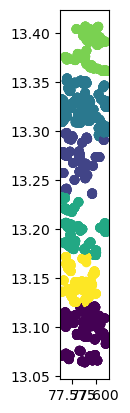

In [11]:
y_data.plot(column="spcv")
plt.show()

## Random Forest

In [12]:
model_rf = RandomForestClassifier(n_estimators=1000, max_features= 'sqrt', max_depth=15, random_state=23)

### RF Random CV (six folds)

In [13]:
random_kfolds = KFold(n_splits=6, random_state=23, shuffle=True) 

In [14]:
rf_random_cv_accuracy = cross_val_score(model_rf, X, y, cv=random_kfolds)

In [15]:
rf_random_cv_accuracy_mean = np.nanmean(rf_random_cv_accuracy)
print(f"RF random CV mean accuracy is: {rf_random_cv_accuracy_mean:.3f}")

RF random CV mean accuracy is: 0.804


In [16]:
# Calculate accuracy for each fold
rf_random_cv_accuracy = cross_val_score(model_rf, X, y, cv=random_kfolds)
print(f"RF random CV accuracy for each fold: {rf_random_cv_accuracy}")

RF random CV accuracy for each fold: [0.76760563 0.79049296 0.80952381 0.82010582 0.81128748 0.82539683]


In [17]:
rf_random_cv_f1 = cross_val_score(model_rf, X, y, cv=random_kfolds, scoring=f1_scoring)

In [18]:
rf_random_cv_f1_mean = np.nanmean(rf_random_cv_f1)
print(f"RF random CV mean F1-score is: {rf_random_cv_f1_mean:.3f}")

RF random CV mean F1-score is: 0.797


In [78]:
rf_random_cv_f1

array([0.77670004, 0.78776529, 0.80361612, 0.80412066, 0.80095278,
       0.80771669])

### RF Spatial CV (six folds)

In [310]:
spatial_kfolds = GroupKFold(n_splits=6)
spatial_kfolds.get_n_splits(X, y, spcv_groups)

6

In [20]:
rf_spatial_cv_accuracy = cross_val_score(model_rf, X, y, cv=spatial_kfolds, groups=spcv_groups)

In [21]:
rf_spatial_cv_accuracy

array([0.65653775, 0.21731449, 0.70348837, 0.62401575, 0.5450237 ,
       0.62418301])

In [22]:
rf_spatial_cv_accuracy_mean = np.nanmean(rf_spatial_cv_accuracy)
print(f"RF spatial CV mean accuracy is: {rf_spatial_cv_accuracy_mean:.3f}")

RF spatial CV mean accuracy is: 0.562


In [23]:
rf_spatial_cv_f1 = cross_val_score(model_rf, X, y, cv=spatial_kfolds, groups=spcv_groups, scoring=f1_scoring)

In [24]:
rf_spatial_cv_f1_mean = np.nanmean(rf_spatial_cv_f1)
print(f"RF spatial CV mean F1-score is: {rf_spatial_cv_f1_mean:.3f}")

RF spatial CV mean F1-score is: 0.450


In [77]:
rf_spatial_cv_f1

array([0.44176595, 0.2866348 , 0.53556642, 0.428992  , 0.49717364,
       0.50825727])

## XGB

In [25]:
model_xgb = XGBClassifier()

### XGB Random CV (six folds)

In [26]:
xgb_random_cv_accuracy = cross_val_score(model_xgb, X, y, cv=random_kfolds)

In [27]:
xgb_random_cv_accuracy_mean = np.nanmean(xgb_random_cv_accuracy)
print(f"XGB random CV mean accuracy is: {xgb_random_cv_accuracy_mean:.3f}")

XGB random CV mean accuracy is: 0.820


In [28]:
# Calculate accuracy for each fold
xgb_random_cv_accuracy = cross_val_score(model_xgb, X, y, cv=random_kfolds)
print(f"xgb random CV accuracy for each fold: {xgb_random_cv_accuracy}")

xgb random CV accuracy for each fold: [0.79225352 0.80985915 0.81481481 0.83950617 0.8324515  0.8324515 ]


In [29]:
xgb_random_cv_f1 = cross_val_score(model_xgb, X, y, cv=random_kfolds, scoring=f1_scoring)

In [30]:
xgb_random_cv_f1_mean = np.nanmean(xgb_random_cv_f1)
print(f"XGB random CV mean F1-score is: {xgb_random_cv_f1_mean:.3f}")

XGB random CV mean F1-score is: 0.818


In [76]:
xgb_random_cv_f1

array([0.80097846, 0.8110228 , 0.81846204, 0.83405677, 0.82710042,
       0.81918668])

### Layout

In [28]:
arr_st[0:16, :, :]

array([[[ 1.2500000e-01,  1.2500000e-01,  1.2500000e-01, ...,
          1.2500000e-01,  1.2500000e-01,  1.2500000e-01],
        [ 1.2500000e-01,  1.2500000e-01,  1.2500000e-01, ...,
          1.2500000e-01,  1.2500000e-01,  1.2500000e-01],
        [ 1.2500000e-01,  1.2500000e-01,  1.2500000e-01, ...,
          1.2500000e-01,  1.2500000e-01,  1.2500000e-01],
        ...,
        [ 1.2500000e-01,  1.2500000e-01,  1.2500000e-01, ...,
          1.2500000e-01,  1.2500000e-01,  1.2500000e-01],
        [ 1.2500000e-01,  1.2500000e-01,  1.2500000e-01, ...,
          1.2500000e-01,  1.2500000e-01,  1.2500000e-01],
        [ 1.2500000e-01,  1.2500000e-01,  1.2500000e-01, ...,
          1.2500000e-01,  1.2500000e-01,  1.2500000e-01]],

       [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, 

In [29]:
x = np.moveaxis(arr_st[0:16,:,:], 0, -1)

In [30]:
x.shape

(7681, 1087, 16)

In [43]:
I = x.reshape(-1, 16)

In [44]:
I

array([[ 1.2500000e-01,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00, -3.4028235e+38,  0.0000000e+00],
       [ 1.2500000e-01,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00, -3.4028235e+38,  0.0000000e+00],
       [ 1.2500000e-01,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00, -3.4028235e+38,  0.0000000e+00],
       ...,
       [ 1.2500000e-01,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00, -3.4028235e+38,  0.0000000e+00],
       [ 1.2500000e-01,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00, -3.4028235e+38,  0.0000000e+00],
       [ 1.2500000e-01,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00, -3.4028235e+38,  0.0000000e+00]], dtype=float32)

In [74]:
params = {
    'num_class': 7
}

In [104]:
final_xgb = XGBClassifier(n_estimators= 1000)

In [105]:
X = y_data.iloc[:,2:18]
y = y_data['Name_3'].values.tolist()
le = LabelEncoder()
y = le.fit_transform(y)
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [106]:
final_xgb.fit(X, y, verbose=2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [107]:
image_pred = final_xgb.predict(I)

In [108]:
image_pred.shape

(8349247,)

In [109]:
image_pred

array([6, 6, 6, ..., 6, 6, 6], dtype=int64)

In [110]:
final = image_pred.reshape(7681,1087)

In [111]:
final

array([[6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6],
       ...,
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6]], dtype=int64)

In [112]:
np.unique(final)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

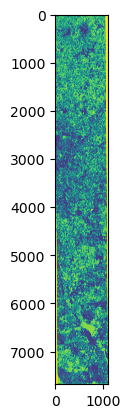

In [113]:
import matplotlib.pyplot as plt
plt.imshow(final.astype(np.float32))

In [181]:
top_left_lat = 1483697.89802
top_left_lon = 777734.696137
pixel_size = 5

num_rows, num_cols = 7681, 1087

In [182]:
import pandas as pd
df = pd.DataFrame(final)

In [183]:
import rasterio
from rasterio.transform import from_origin
# Create a rasterio-compatible transform
transform = from_origin(top_left_lon, top_left_lat, pixel_size, pixel_size)

# Define the output path for the georeferenced raster
output_path = 'C:/Users/Manager/Desktop/Satya/Objective 1 Results/New output/FinalXGBlayout.tif'

# Write the georeferenced raster to a GeoTIFF file
with rasterio.open(output_path, 'w', driver='GTiff', height=num_rows, width=num_cols,
                   count=1, dtype='int16', crs='EPSG:32643', transform=transform) as dst: #4326
    dst.write(df, 1)

print(f"Georeferenced raster saved to {output_path}")

Georeferenced raster saved to C:/Users/Manager/Desktop/Satya/Objective 1 Results/New output/FinalXGBlayout.tif


### XGB Spatial CV (six folds)

In [302]:
XYs = y_data['geometry']
X = y_data.iloc[:,2:18]
y = y_data['Name_3'].values.tolist()
le = LabelEncoder()
y = le.fit_transform(y)
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [303]:
import numpy as np
print(np.unique(y))  # This will give us all unique class labels

[0 1 2 3 4 5 6]


In [304]:
params = {
    'num_class': 7,
}

In [305]:
model_xgb2 = XGBClassifier(objective='multi:softmax', n_estimators= 1000,weights=[0.99, 0.01], **params)

In [306]:
xgb_spatial_cv_accuracy = cross_val_score(model_xgb2, X, y, cv=spatial_kfolds, groups=spcv_groups)

C:\Users\Manager\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:37:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "weights" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Manager\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:37:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "weights" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Manager\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:37:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "weights" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Manager\anaconda3\lib\site-packages\xgboost\core.py:158: U

In [307]:
xgb_spatial_cv_accuracy_mean = np.nanmean(xgb_spatial_cv_accuracy)
print(f"XGB spatial CV mean accuracy is: {xgb_spatial_cv_accuracy_mean:.3f}")

XGB spatial CV mean accuracy is: 0.620


In [308]:
xgb_spatial_cv_accuracy

array([0.6335175 ,        nan, 0.67829457, 0.60629921, 0.58530806,
       0.59803922])

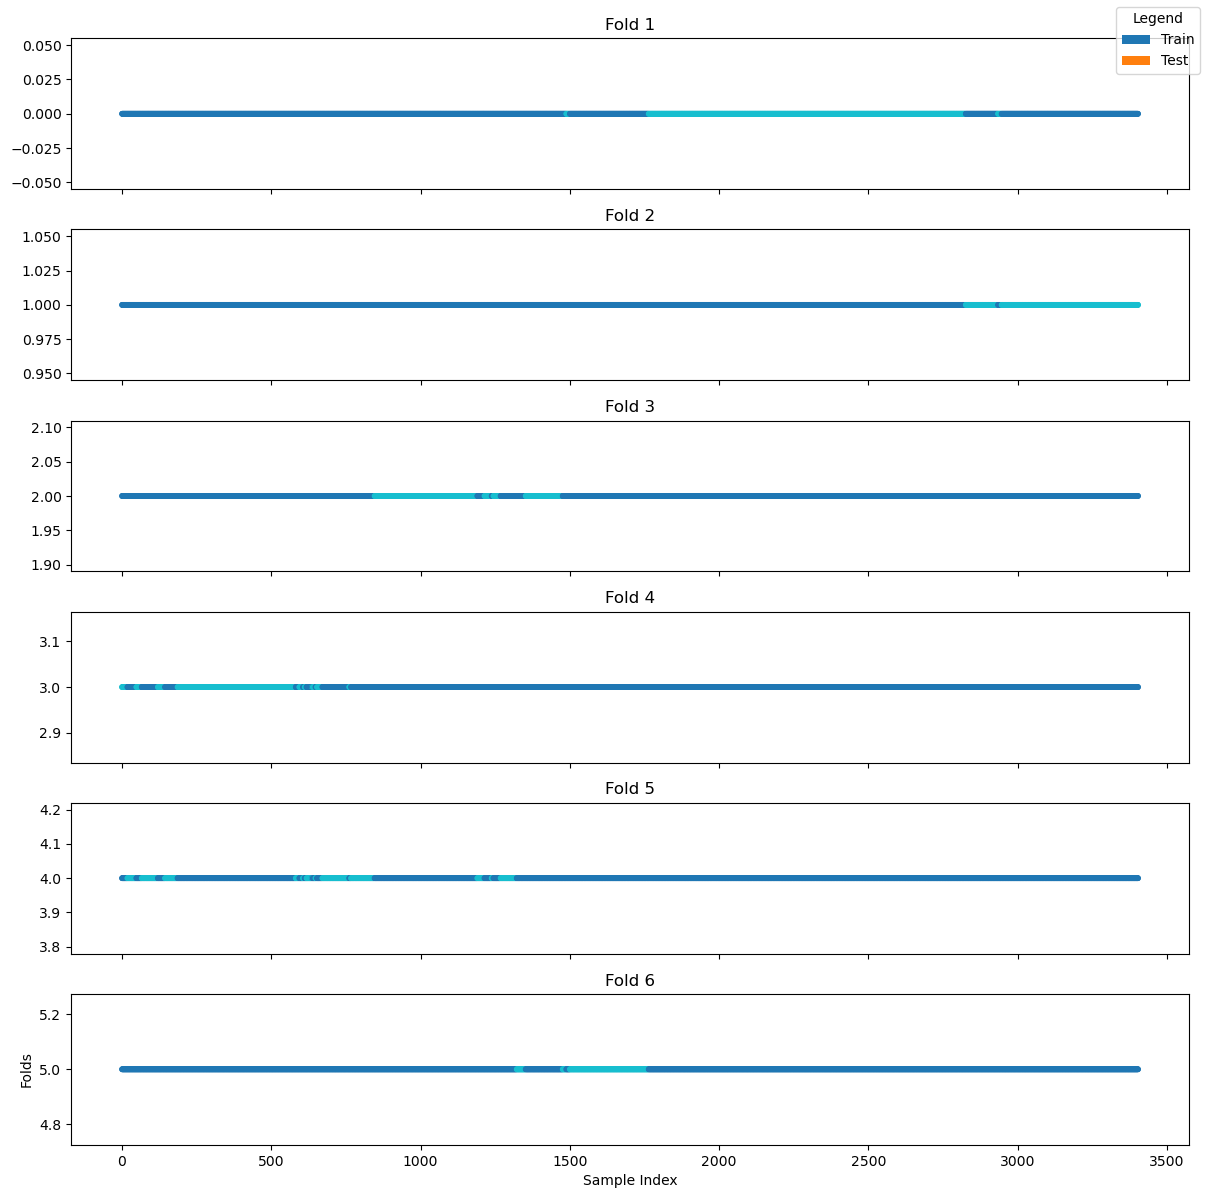

In [326]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Create a figure to plot the folds
n_splits = 6
f, ax = plt.subplots(n_splits, 1, figsize=(12, 2 * n_splits), sharex=True)

# Generate the GroupKFold splits
for fold_idx, (train_idx, test_idx) in enumerate(spatial_kfolds.split(X, y, groups=spcv_groups)):
    # Create an array where each index is labeled for train/test
    fold_labels = np.zeros(len(X), dtype=int)  # Default is 0 (not in fold)
    fold_labels[train_idx] = 1  # Train samples
    fold_labels[test_idx] = 2  # Test samples

    # Plot the fold
    ax[fold_idx].scatter(
        range(len(fold_labels)),  # X-axis: indices of samples
        [fold_idx] * len(fold_labels),  # Y-axis: constant for the fold
        c=fold_labels, cmap='tab10', s=10, label=f"Fold {fold_idx+1}"
    )
    ax[fold_idx].set_title(f"Fold {fold_idx + 1}")

# Add legend
legend_elements = [
    Patch(facecolor='tab:blue', label='Train'),
    Patch(facecolor='tab:orange', label='Test')
]
f.legend(handles=legend_elements, loc='upper right', title="Legend")

# Label axes and show plot
plt.xlabel("Sample Index")
plt.ylabel("Folds")
plt.tight_layout()
plt.show()


C:\Users\Manager\anaconda3\lib\site-packages\spacv\grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
C:\Users\Manager\anaconda3\lib\site-packages\spacv\grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
C:\Users\Manager\anaconda3\lib\site-packages\spacv\grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and wil

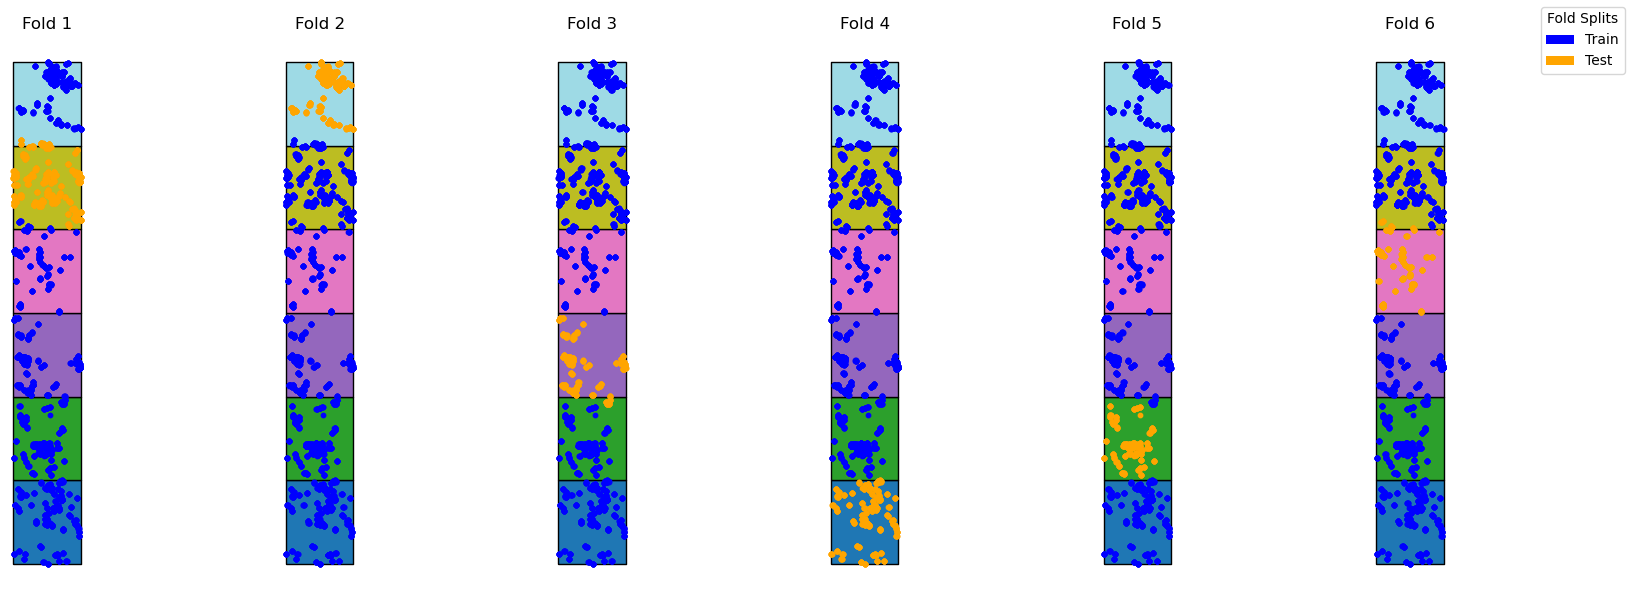

In [415]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Convert the geometry column into a GeoDataFrame if not already
if not isinstance(XYs, gpd.GeoDataFrame):
    XYs = gpd.GeoDataFrame(y_data, geometry=y_data['geometry'])

# Check and fix geometry column if needed
if XYs.geometry.dtype != 'geometry':
    XYs['geometry'] = gpd.GeoSeries(XYs['geometry'])

# Spatial KFold splitting
spatial_kfolds = GroupKFold(n_splits=6)
folds = list(spatial_kfolds.split(X, y, groups=spcv_groups))

# Function to create the grid and plot with train/test points
def plot_spatial_kfold_splits(XYs, folds, output_path=None):
    # Create the plot
    fig, axes = plt.subplots(1, len(folds), figsize=(18, 6), sharey=True)

    for i, (train_idx, test_idx) in enumerate(folds):
        # Assign labels for the fold
        XYs['fold'] = 'Other'
        XYs.loc[train_idx, 'fold'] = 'Train'
        XYs.loc[test_idx, 'fold'] = 'Test'

        # Plot the grid (construct_blocks is assumed to work with XYs)
        grid = construct_blocks(XYs, tiles_x=1, tiles_y=6, method='unique')
        grid.plot(
            column='grid_id',
            cmap='tab20',
            edgecolor='black',
            ax=axes[i]
        )

        # Plot the train and test points
        XYs[XYs['fold'] == 'Train'].plot(ax=axes[i], color='blue', markersize=10, label='Train')
        XYs[XYs['fold'] == 'Test'].plot(ax=axes[i], color='orange', markersize=10, label='Test')

        # Add title for the fold
        axes[i].set_title(f"Fold {i + 1}")
        axes[i].axis('off')

    # Add a legend to the figure
    legend_elements = [
        Patch(facecolor='blue', label='Train'),
        Patch(facecolor='orange', label='Test')
    ]
    fig.legend(handles=legend_elements, loc='upper right', title="Fold Splits")

    # Adjust the white space between subplots
    #plt.subplots_adjust(wspace=0.1, hspace=0.1)
    
    plt.tight_layout(pad=1.0, w_pad=0.01, h_pad=0.5)

    # Save the figure if output_path is provided
    if output_path:
        fig.savefig(output_path, dpi=2000, bbox_inches="tight")

    # Show the plot
    plt.show()


# Call the function with your data and specify the output file path
plot_spatial_kfold_splits(
    XYs,
    folds,
    output_path='C:/Users/Manager/Desktop/Satya/Objective 1 Results/New output/spatial_kfold_splits.png'
)


C:\Users\Manager\anaconda3\lib\site-packages\spacv\grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
C:\Users\Manager\anaconda3\lib\site-packages\spacv\grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
C:\Users\Manager\anaconda3\lib\site-packages\spacv\grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and wil

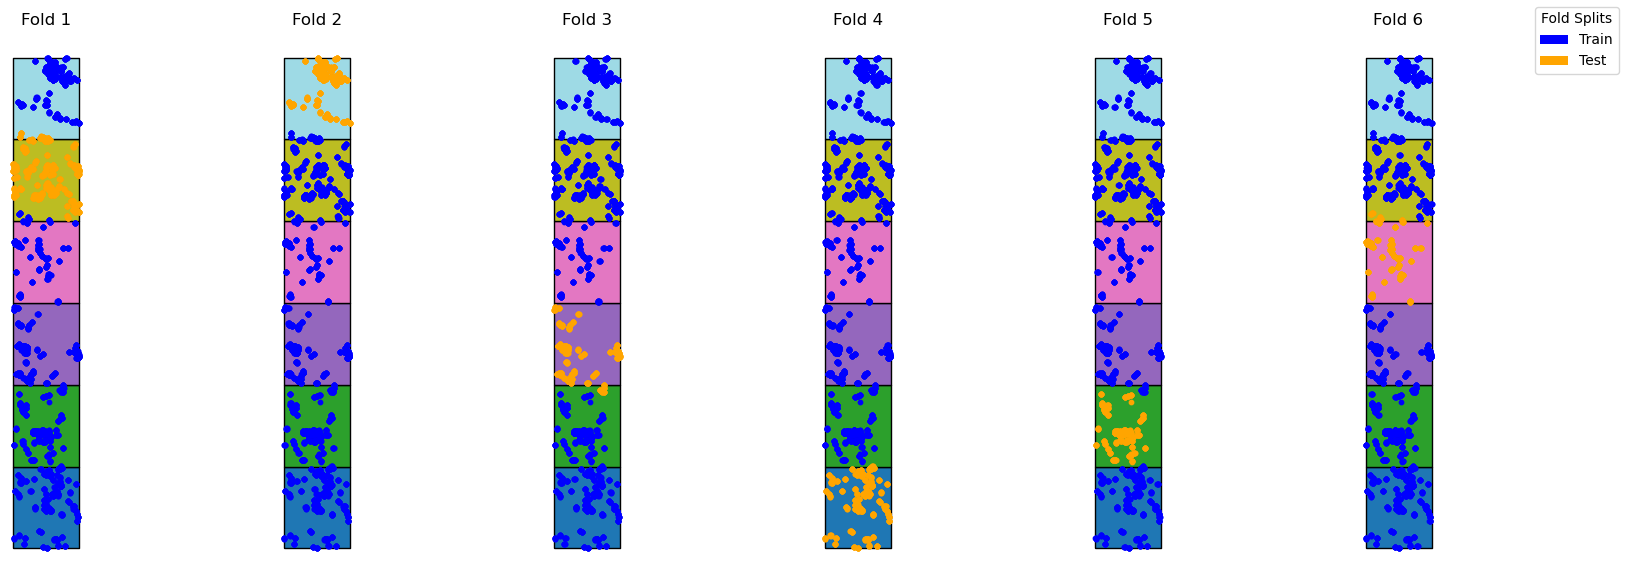

In [417]:
# Function to create the grid and plot with train/test points
def plot_spatial_kfold_splits(XYs, folds, output_path=None):
    # Create the plot
    fig, axes = plt.subplots(1, len(folds), figsize=(18, 6), sharey=True)

    for i, (train_idx, test_idx) in enumerate(folds):
        # Assign labels for the fold
        XYs['fold'] = 'Other'
        XYs.loc[train_idx, 'fold'] = 'Train'
        XYs.loc[test_idx, 'fold'] = 'Test'

        # Plot the grid (construct_blocks is assumed to work with XYs)
        grid = construct_blocks(XYs, tiles_x=1, tiles_y=6, method='unique')
        grid.plot(
            column='grid_id',
            cmap='tab20',
            edgecolor='black',
            ax=axes[i]
        )

        # Plot the train and test points
        XYs[XYs['fold'] == 'Train'].plot(ax=axes[i], color='blue', markersize=10, label='Train')
        XYs[XYs['fold'] == 'Test'].plot(ax=axes[i], color='orange', markersize=10, label='Test')

        # Add title for the fold
        axes[i].set_title(f"Fold {i + 1}")
        axes[i].axis('off')

    # Add a legend to the figure
    legend_elements = [
        Patch(facecolor='blue', label='Train'),
        Patch(facecolor='orange', label='Test')
    ]
    fig.legend(handles=legend_elements, loc='upper right', title="Fold Splits")

    # Adjust spacing manually
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.01, hspace=0.01)

    # Save the figure if output_path is provided
    if output_path:
        fig.savefig(output_path, dpi=2000, bbox_inches="tight")

    # Show the plot
    plt.show()
    
# Call the function with your data and specify the output file path
plot_spatial_kfold_splits(
    XYs,
    folds,
    output_path='C:/Users/Manager/Desktop/Satya/Objective 1 Results/New output/spatial_kfold_splits.png'
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Manager\anaconda3\lib\site-packages\spacv\grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Manager\anaconda3\lib\site-packages\spacv\grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)

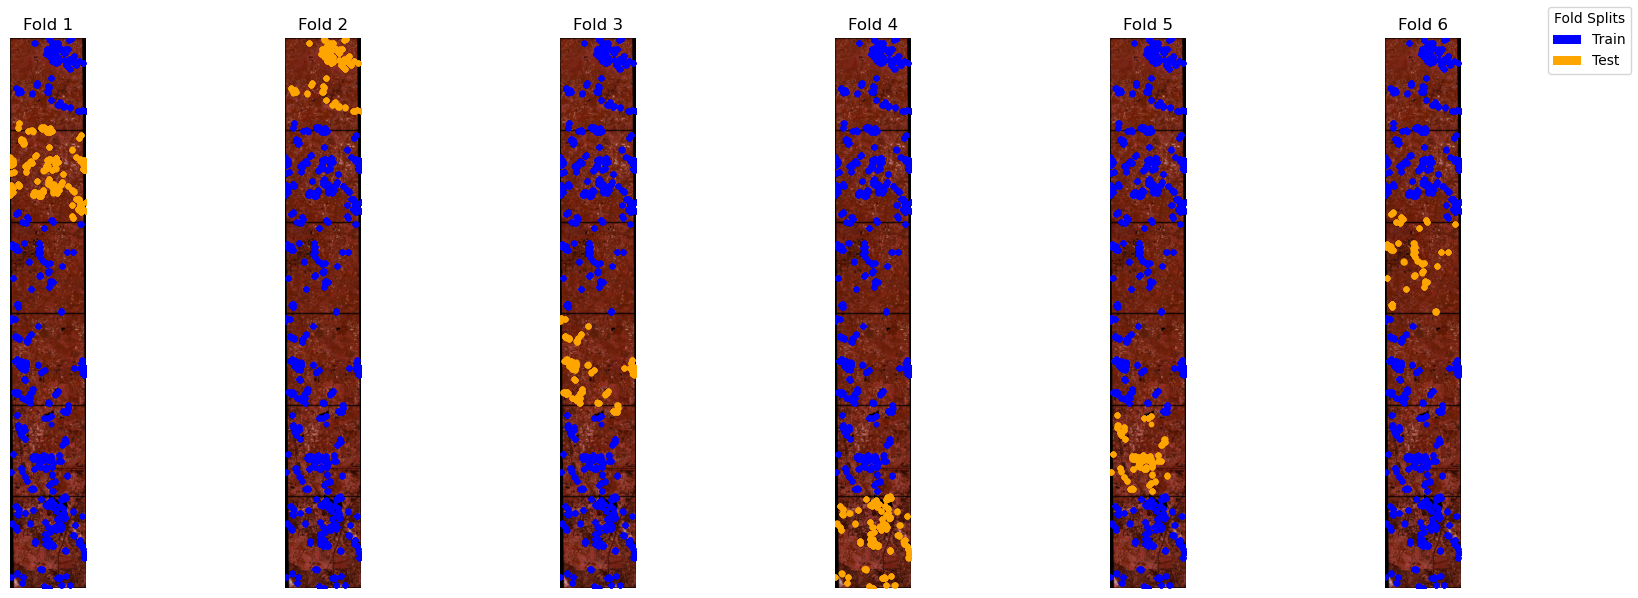

In [383]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from sklearn.model_selection import GroupKFold

# Convert the geometry column into a GeoDataFrame if not already
if not isinstance(XYs, gpd.GeoDataFrame):
    XYs = gpd.GeoDataFrame(y_data, geometry=y_data['geometry'])

# Check and fix geometry column if needed
if XYs.geometry.dtype != 'geometry':
    XYs['geometry'] = gpd.GeoSeries(XYs['geometry'])

# Spatial KFold splitting
spatial_kfolds = GroupKFold(n_splits=6)
folds = list(spatial_kfolds.split(X, y, groups=spcv_groups))

rgb_image = np.stack([arr_st[1], arr_st[2], arr_st[3]], axis=-1)

# Function to create the grid and plot with train/test points
def plot_spatial_kfold_splits_with_background(XYs, folds, rgb_image):
    # Create the plot
    fig, axes = plt.subplots(1, len(folds), figsize=(18, 6), sharey=True)

    # Get the bounds of the raster image for setting the extent
    bounds = XYs.total_bounds  # [minx, miny, maxx, maxy]
    raster_extent = [bounds[0], bounds[2], bounds[1], bounds[3]]

    for i, (train_idx, test_idx) in enumerate(folds):
        # Assign labels for the fold
        XYs['fold'] = 'Other'
        XYs.loc[train_idx, 'fold'] = 'Train'
        XYs.loc[test_idx, 'fold'] = 'Test'

        # Plot the background RGB image
        axes[i].imshow(rgb_image, extent=raster_extent, origin='upper', zorder=0)

        # Plot the train and test points
        XYs[XYs['fold'] == 'Train'].plot(
            ax=axes[i], color='blue', markersize=10, label='Train', zorder=3
        )
        XYs[XYs['fold'] == 'Test'].plot(
            ax=axes[i], color='orange', markersize=10, label='Test', zorder=4
        )

        # Plot the grid (construct_blocks is assumed to work with XYs)
        grid = construct_blocks(XYs, tiles_x=1, tiles_y=6, method='unique')
        grid.plot(
            column='grid_id',
            facecolor='none',
            edgecolor='black',
            ax=axes[i],
            alpha=0.5,  # Adjust transparency to make the background visible
            zorder=2
        )

        # Add title for the fold
        axes[i].set_title(f"Fold {i + 1}")
        axes[i].axis('off')

    # Add a legend to the figure
    legend_elements = [
        Patch(facecolor='blue', label='Train'),
        Patch(facecolor='orange', label='Test')
    ]
    fig.legend(handles=legend_elements, loc='upper right', title="Fold Splits")

    plt.tight_layout()
    plt.show()

# Call the function with your data and background image
plot_spatial_kfold_splits_with_background(XYs, folds, rgb_image)


C:\Users\Manager\anaconda3\lib\site-packages\spacv\grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
C:\Users\Manager\anaconda3\lib\site-packages\spacv\grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]
C:\Users\Manager\anaconda3\lib\site-packages\spacv\grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and wil

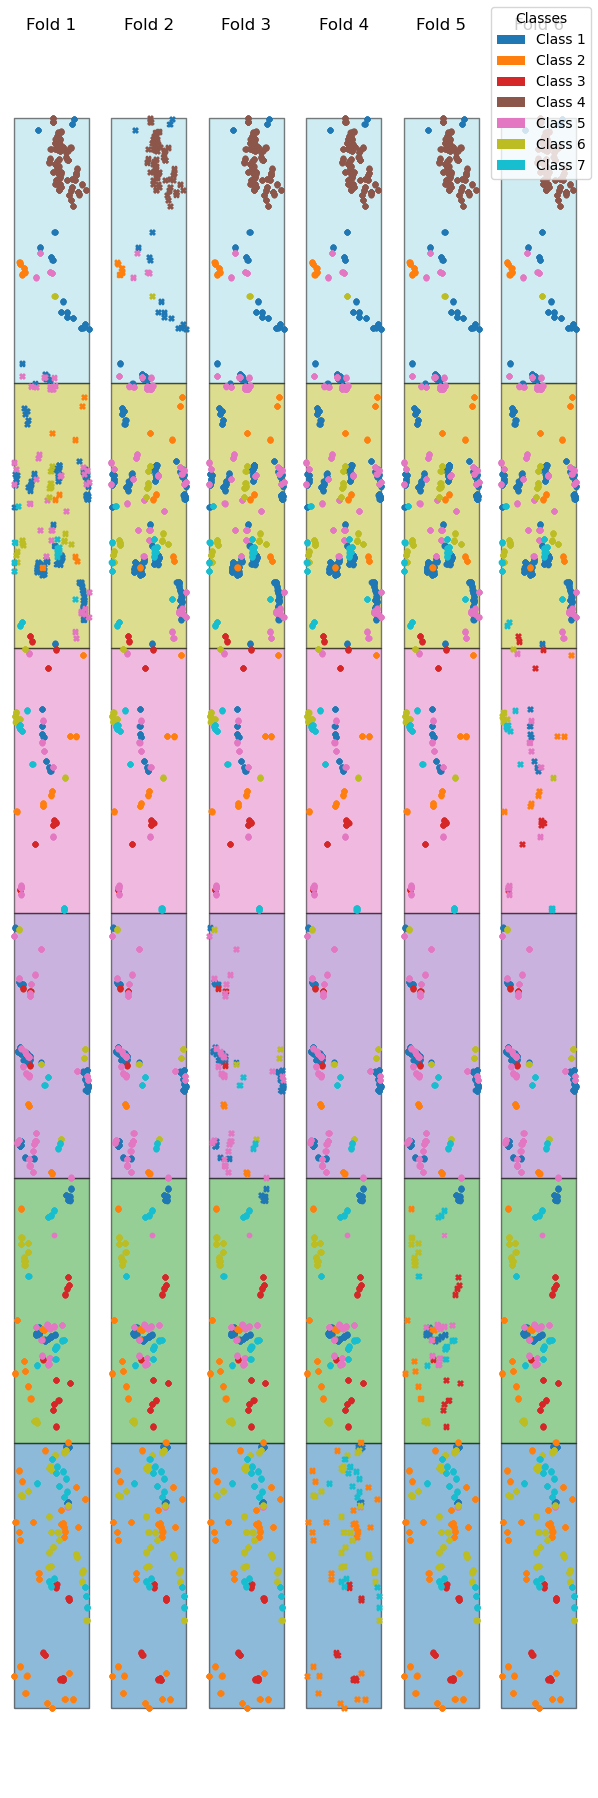

In [353]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

# Ensure XYs is a GeoDataFrame
if not isinstance(XYs, gpd.GeoDataFrame):
    XYs = gpd.GeoDataFrame(y_data, geometry=y_data['geometry'])

# Filter out invalid geometries
XYs = XYs[XYs.geometry.notnull() & XYs.is_valid]

# Add class names as a column
XYs['class_name'] = y

# Set CRS for consistency
XYs = XYs.set_crs("EPSG:4326")

# Define class names and assign colors
class_names = sorted(XYs['class_name'].unique())
class_colors = plt.cm.tab10(np.linspace(0, 1, len(class_names)))
class_color_map = dict(zip(class_names, class_colors))

# Spatial KFold splitting
spatial_kfolds = GroupKFold(n_splits=6)
folds = list(spatial_kfolds.split(X, y, groups=spcv_groups))

# Function to plot spatial k-fold splits with classes
def plot_spatial_kfold_splits_with_classes(XYs, folds):
    fig, axes = plt.subplots(1, len(folds), figsize=(6, 18), sharey=True)

    for i, (train_idx, test_idx) in enumerate(folds):
        # Skip empty folds
        if len(train_idx) == 0 or len(test_idx) == 0:
            print(f"Skipping Fold {i + 1} due to empty train/test data")
            continue

        # Assign fold labels
        XYs['fold'] = 'Other'
        XYs.loc[train_idx, 'fold'] = 'Train'
        XYs.loc[test_idx, 'fold'] = 'Test'

        # Generate the grid and ensure CRS matches
        grid = construct_blocks(XYs, tiles_x=1, tiles_y=6, method='unique')
        grid = grid[grid.geometry.notnull() & grid.is_valid]
        grid = grid.set_crs(XYs.crs)

        # Plot grid
        grid.plot(
            column='grid_id',
            cmap='tab20',
            edgecolor='black',
            ax=axes[i],
            alpha=0.5
        )

        # Plot points by class
        for class_name in class_names:
            # Subset for train and test points
            train_subset = XYs[(XYs['fold'] == 'Train') & (XYs['class_name'] == class_name)]
            test_subset = XYs[(XYs['fold'] == 'Test') & (XYs['class_name'] == class_name)]

            if len(train_subset) > 0:
                train_subset.plot(
                    ax=axes[i],
                    color=class_color_map[class_name],
                    markersize=10,
                    label=f"Train - {class_name}"
                )

            if len(test_subset) > 0:
                test_subset.plot(
                    ax=axes[i],
                    color=class_color_map[class_name],
                    marker='x',
                    markersize=10,
                    label=f"Test - {class_name}"
                )

        # Add title for the fold
        axes[i].set_title(f"Fold {i + 1}")
        axes[i].axis('off')
        axes[i].set_aspect('auto')  # Explicitly set aspect ratio

    # Add a legend for classes
    legend_elements = [
        Patch(facecolor=class_color_map[class_name], label=f"Class {class_name}")
        for class_name in class_names
    ]
    fig.legend(handles=legend_elements, loc='upper right', title="Classes")

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_spatial_kfold_splits_with_classes(XYs, folds)


C:\Users\Manager\anaconda3\lib\site-packages\spacv\grid_builder.py:112: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  polys = [asPolygon(polys[:,:,i]) for i in range(tiles_x*tiles_y)]


((77.56207192967585,
  77.61424130119516,
  13.046694398927434,
  13.424298127956286),
 (0.0, 1.0, 0.0, 1.0))

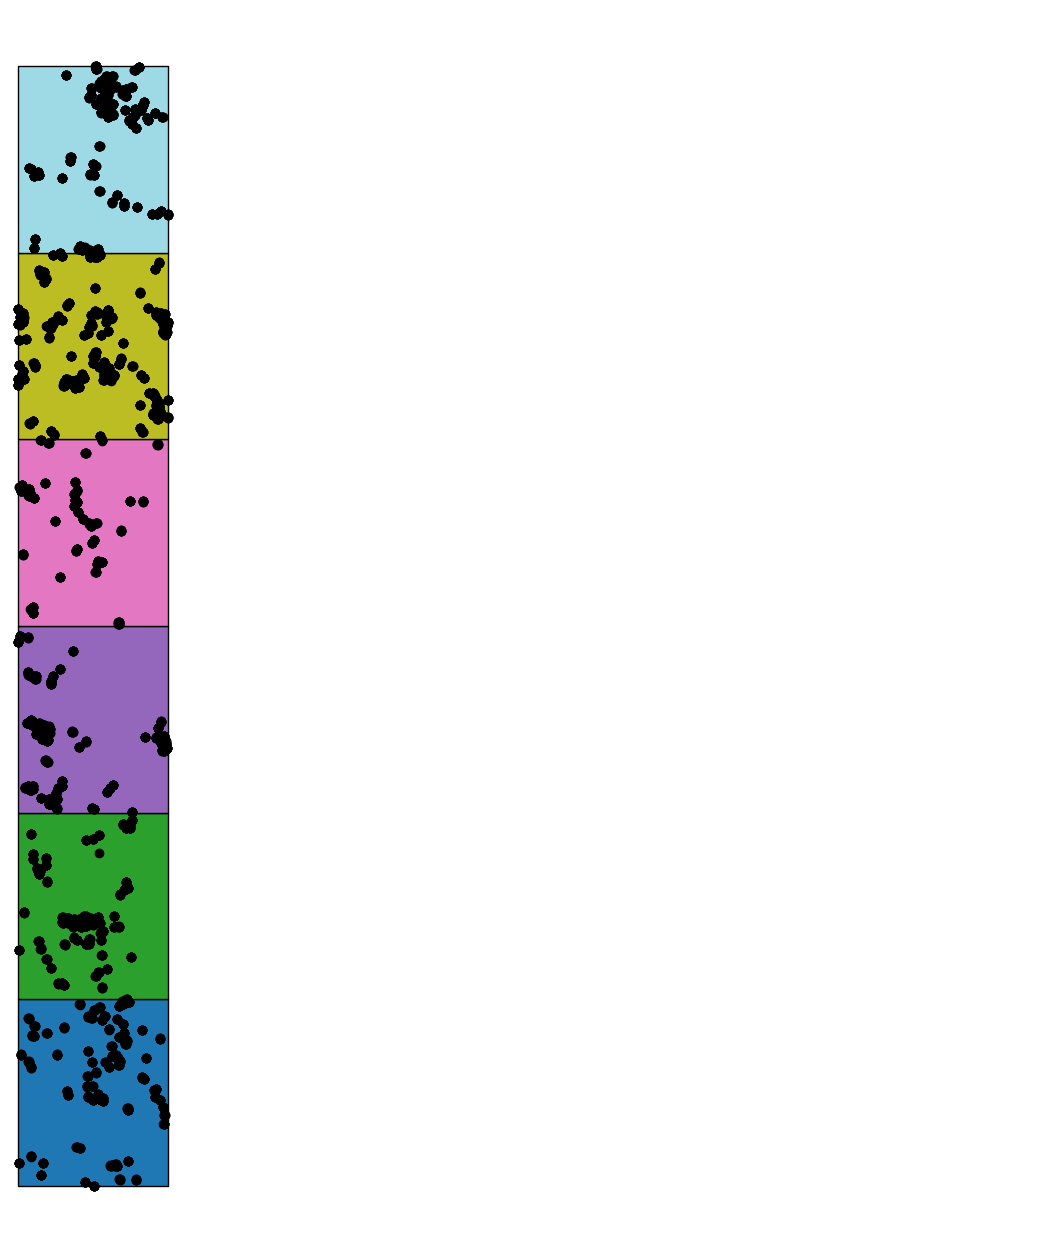

In [325]:
f, ax = plt.subplots(1,2, figsize=(16,16))
construct_blocks(XYs, tiles_x=1, tiles_y=6, method='unique').plot(column='grid_id',
                                edgecolor='black', cmap='tab20',ax=ax[0])
XYs.plot(ax=ax[0], color='black')
ax[0].axis('off'), ax[1].axis('off')

In [60]:
xgb_spatial_cv_f1 = cross_val_score(model_xgb, X, y, cv=spatial_kfolds, groups=spcv_groups, scoring=f1_scoring)

C:\Users\Manager\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Manager\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Manager\anaconda3\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "C:\Users\Manager\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0

In [61]:
xgb_spatial_cv_f1_mean = np.nanmean(xgb_spatial_cv_f1)
print(f"XGB spatial CV mean accuracy is: {xgb_spatial_cv_f1_mean:.3f}")

XGB spatial CV mean accuracy is: 0.486


In [63]:
xgb_spatial_cv_f1

array([0.44530658,        nan, 0.55082313, 0.41257206, 0.5350882 ,
       0.48538057])

## LGB

In [64]:
model_lgb = lgb.LGBMClassifier()

### LGB Random CV (six folds)

In [65]:
lgb_random_cv_accuracy = cross_val_score(model_lgb, X, y, cv=random_kfolds)

In [66]:
lgb_random_cv_accuracy_mean = np.nanmean(lgb_random_cv_accuracy)
print(f"LGB random CV mean accuracy is: {lgb_random_cv_accuracy_mean:.3f}")

LGB random CV mean accuracy is: 0.813


In [67]:
lgb_random_cv_accuracy

array([0.77816901, 0.80457746, 0.80952381, 0.82892416, 0.81834215,
       0.8377425 ])

In [68]:
lgb_random_cv_f1 = cross_val_score(model_lgb, X, y, cv=random_kfolds, scoring=f1_scoring)

In [69]:
lgb_random_cv_f1_mean = np.nanmean(lgb_random_cv_f1)
print(f"LGB random CV mean F1-score is: {lgb_random_cv_f1_mean:.3f}")

LGB random CV mean F1-score is: 0.811


In [75]:
lgb_random_cv_f1

array([0.79053977, 0.80532527, 0.81342126, 0.81277416, 0.81765787,
       0.82614663])

### LGB Spatial CV (six folds)

In [70]:
lgb_spatial_cv_accuracy = cross_val_score(model_lgb, X, y, cv=spatial_kfolds, groups=spcv_groups)

In [71]:
lgb_spatial_cv_accuracy_mean = np.nanmean(lgb_spatial_cv_accuracy)
print(f"LGB spatial CV mean accuracy is: {lgb_spatial_cv_accuracy_mean:.3f}")

LGB spatial CV mean accuracy is: 0.566


In [72]:
lgb_spatial_cv_accuracy

array([0.65009208, 0.21908127, 0.70348837, 0.62007874, 0.59478673,
       0.60784314])

In [73]:
lgb_spatial_cv_f1 = cross_val_score(model_lgb, X, y, cv=spatial_kfolds, groups=spcv_groups, scoring=f1_scoring)

In [42]:
lgb_spatial_cv_f1_mean = np.nanmean(lgb_spatial_cv_f1)
print(f"LGB spatial F1 accuracy is: {lgb_spatial_cv_f1_mean:.3f}")

LGB spatial F1 accuracy is: 0.455


In [74]:
lgb_spatial_cv_f1

array([0.44292204, 0.27100741, 0.55676755, 0.4230181 , 0.54003462,
       0.49423865])

## Final Summary

### Make boxplots

In [79]:
model_names = np.concatenate([([i]*6) for i in ['RF', 'XGB', 'LGB']], axis=0)

In [80]:
# Accuracy dataframe
rdcv_ac = pd.DataFrame({
    'CV': ['Random']*18, 
    'Model': model_names.tolist(), 
    'Val': rf_random_cv_accuracy.tolist() + xgb_random_cv_accuracy.tolist() + lgb_random_cv_accuracy.tolist()
})

spcv_ac = pd.DataFrame({
    'CV': ['Spatial']*18, 
    'Model': model_names.tolist(), 
    'Val': rf_spatial_cv_accuracy.tolist() + xgb_spatial_cv_accuracy.tolist() + lgb_spatial_cv_accuracy.tolist()
})



In [81]:
ac_df = pd.concat([rdcv_ac, spcv_ac.drop([1, 7, 13])])
ac_df['Metric'] = 'Accuracy'
ac_df

,CV,Model,Val,Metric
0,Random,RF,0.767606,Accuracy
1,Random,RF,0.790493,Accuracy
2,Random,RF,0.809524,Accuracy
3,Random,RF,0.820106,Accuracy
4,Random,RF,0.811287,Accuracy
5,Random,RF,0.825397,Accuracy
6,Random,XGB,0.792254,Accuracy
7,Random,XGB,0.809859,Accuracy
8,Random,XGB,0.814815,Accuracy
9,Random,XGB,0.839506,Accuracy


In [82]:
# F1 dataframe
rdcv_f1 = pd.DataFrame({
    'CV': ['Random']*18, 
    'Model': model_names.tolist(), 
    'Val': rf_random_cv_f1.tolist() + xgb_random_cv_f1.tolist() + lgb_random_cv_f1.tolist()
})

spcv_f1 = pd.DataFrame({
    'CV': ['Spatial']*18, 
    'Model': model_names.tolist(), 
    'Val': rf_spatial_cv_f1.tolist() + xgb_spatial_cv_f1.tolist() + lgb_spatial_cv_f1.tolist()
})

In [83]:
f1_df = pd.concat([rdcv_f1, spcv_f1.drop([1, 7, 13])])
f1_df['Metric'] = 'F1-Score'
f1_df

,CV,Model,Val,Metric
0,Random,RF,0.776700,F1-Score
1,Random,RF,0.787765,F1-Score
2,Random,RF,0.803616,F1-Score
3,Random,RF,0.804121,F1-Score
4,Random,RF,0.800953,F1-Score
5,Random,RF,0.807717,F1-Score
6,Random,XGB,0.800978,F1-Score
7,Random,XGB,0.811023,F1-Score
8,Random,XGB,0.818462,F1-Score
9,Random,XGB,0.834057,F1-Score


In [84]:
metric_df = pd.concat([ac_df, f1_df])
metric_df

,CV,Model,Val,Metric
0,Random,RF,0.767606,Accuracy
1,Random,RF,0.790493,Accuracy
2,Random,RF,0.809524,Accuracy
3,Random,RF,0.820106,Accuracy
4,Random,RF,0.811287,Accuracy
...,...,...,...,...
12,Spatial,LGB,0.442922,F1-Score
14,Spatial,LGB,0.556768,F1-Score
15,Spatial,LGB,0.423018,F1-Score
16,Spatial,LGB,0.540035,F1-Score


In [85]:
import seaborn as sns

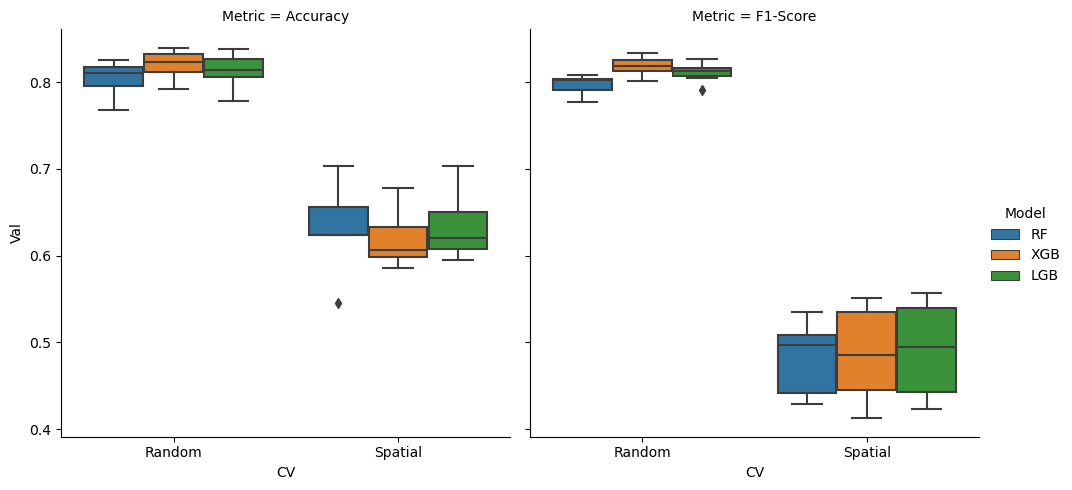

In [86]:
sns.catplot(
    data=metric_df, x='CV', y='Val', hue='Model',
    col='Metric', kind='box'
)
plt.show()

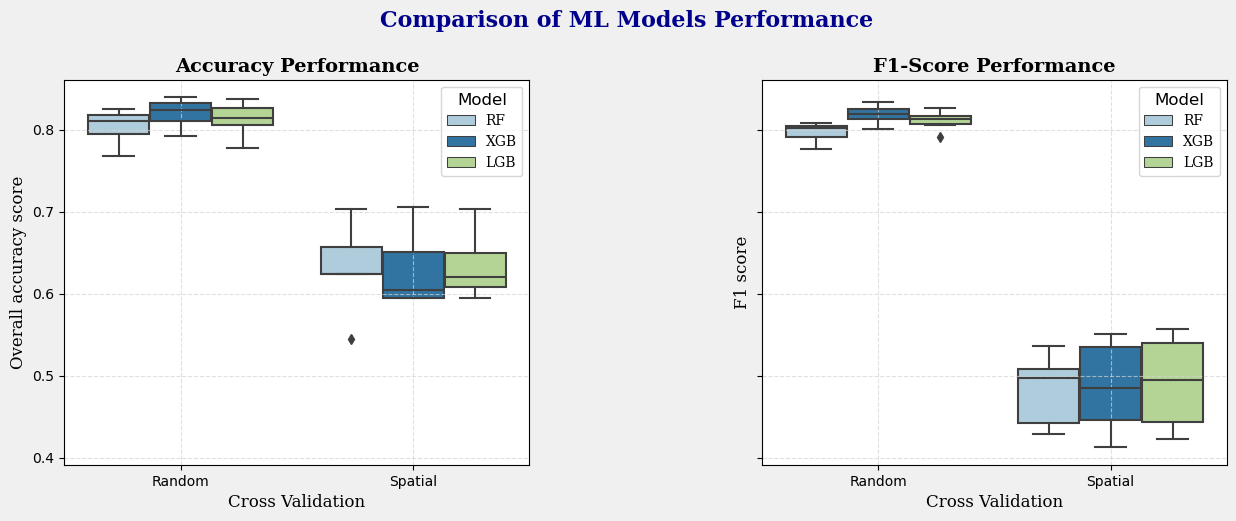

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a more visually appealing color palette
custom_palette = sns.color_palette("Paired", n_colors=len(metric_df['Model'].unique()))

# Create subplots
fig, ax = plt.subplots(1, len(metric_df['Metric'].unique()), figsize=(15, 5), sharey=True)

# Define y-axis labels for each subplot
y_labels = ['Overall accuracy score', 'F1 score']

# Loop through unique metrics
for i, metric in enumerate(metric_df['Metric'].unique()):
    sns.boxplot(data=metric_df[metric_df['Metric'] == metric], x='CV', y='Val', hue='Model', ax=ax[i], palette=custom_palette)
    
    # Customize each subplot
    ax[i].grid(True, linestyle='--', alpha=0.7, color='lightgray')  # Adjust grid appearance
    ax[i].set_title(f'{metric} Performance', fontsize=14, fontweight='bold', fontfamily='serif')
    ax[i].set_xlabel('Cross Validation', fontsize=12, fontfamily='serif')
    ax[i].set_ylabel(y_labels[i], fontsize=12, fontfamily='serif')
    ax[i].legend(title='Model', title_fontsize='12', loc='upper right', prop={'family': 'serif'})

# Set the facecolor of the figure (background color)
fig.set_facecolor('#F0F0F0')  # Adjust the background color as needed

# Adjust the white space between subplots
plt.subplots_adjust(wspace=0.5)

# Add a main title
plt.suptitle('Comparison of ML Models Performance', y=1.02, fontsize=16, fontweight='bold', fontfamily='serif', color='darkblue')

# Save the plot before calling plt.show()
plt.savefig('C:/Users/Manager/Desktop/Python/Objective 1/Results/Boxplot.png', bbox_inches='tight')

# Show the plot
plt.show()


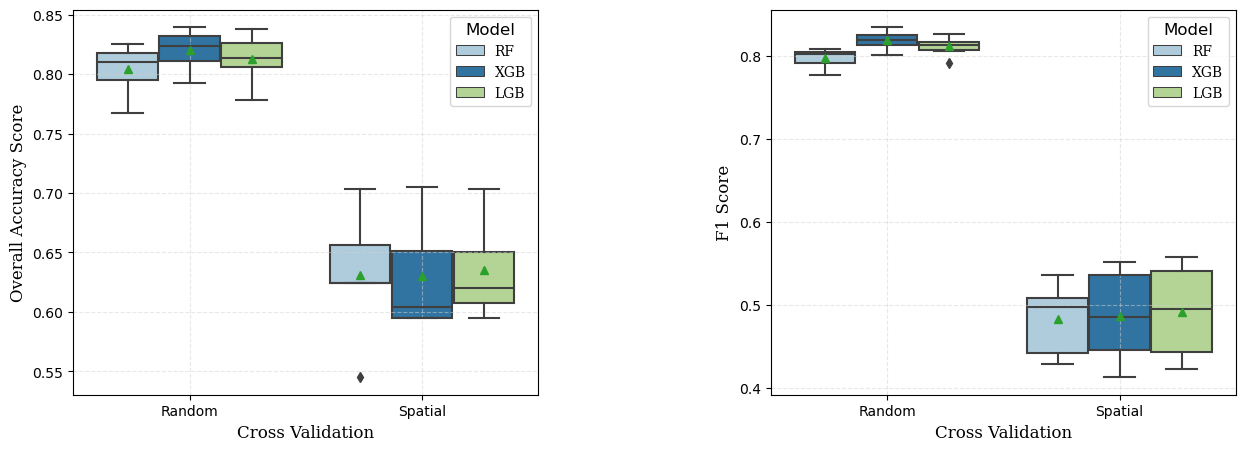

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a more visually appealing color palette
custom_palette = sns.color_palette("Paired", n_colors=len(metric_df['Model'].unique()))

# Create subplots without sharing the y-axis
fig, ax = plt.subplots(1, len(metric_df['Metric'].unique()), figsize=(15, 5))

# Define y-axis labels for each subplot
y_labels = ['Overall Accuracy Score', 'F1 Score']

# Loop through unique metrics
for i, metric in enumerate(metric_df['Metric'].unique()):
    sns.boxplot(data=metric_df[metric_df['Metric'] == metric], x='CV', y='Val', hue='Model', ax=ax[i], palette=custom_palette, showmeans=True, meanline=None)
    
    # Customize each subplot
    ax[i].grid(True, linestyle='--', alpha=0.5, color='lightgray')  # Adjust grid appearance
    #ax[i].set_title(f'{metric} Performance', fontsize=14, fontweight='bold', fontfamily='serif')
    ax[i].set_xlabel('Cross Validation', fontsize=12, fontfamily='serif')
    ax[i].set_ylabel(y_labels[i], fontsize=12, fontfamily='serif')
    ax[i].legend(title='Model', title_fontsize='12', loc='upper right', prop={'family': 'serif'})

# Set the facecolor of the figure (background color)
#fig.set_facecolor('#F0F0F0')  # Adjust the background color as needed

# Adjust the white space between subplots
plt.subplots_adjust(wspace=0.5)

# Add a main title if needed
#plt.suptitle('Comparison of ML Models Performance', y=1.02, fontsize=16, fontweight='bold', fontfamily='serif', color='darkblue')

# Save the plot before calling plt.show()
plt.savefig('C:/Users/Manager/Desktop/Python/Objective 1/Results/Boxplot.png', bbox_inches='tight', dpi=1200)

# Show the plot
plt.show()


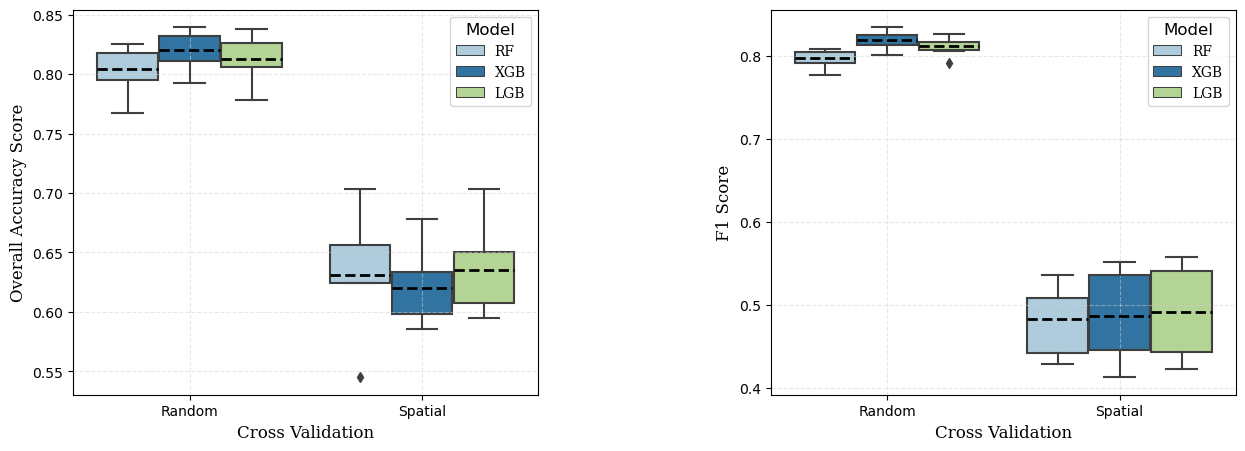

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a more visually appealing color palette
custom_palette = sns.color_palette("Paired", n_colors=len(metric_df['Model'].unique()))

# Create subplots without sharing the y-axis
fig, ax = plt.subplots(1, len(metric_df['Metric'].unique()), figsize=(15, 5))

# Define y-axis labels for each subplot
y_labels = ['Overall Accuracy Score', 'F1 Score']

# Loop through unique metrics
for i, metric in enumerate(metric_df['Metric'].unique()):
    sns.boxplot(
        data=metric_df[metric_df['Metric'] == metric],
        x='CV', y='Val', hue='Model', ax=ax[i], palette=custom_palette,
        showmeans=True, meanline=True, 
        meanprops={'color': 'black', 'linewidth': 2},  # Black line for the mean
        medianprops={'color': 'none'}  # Remove the black median line
    )
    
    # Customize each subplot
    ax[i].grid(True, linestyle='--', alpha=0.5, color='lightgray')  # Adjust grid appearance
    ax[i].set_xlabel('Cross Validation', fontsize=12, fontfamily='serif')
    ax[i].set_ylabel(y_labels[i], fontsize=12, fontfamily='serif')
    ax[i].legend(title='Model', title_fontsize='12', loc='upper right', prop={'family': 'serif'})

# Adjust the white space between subplots
plt.subplots_adjust(wspace=0.5)

# Save the plot before calling plt.show()
plt.savefig('C:/Users/Manager/Desktop/Python/Objective 1/Results/Boxplot_highlighted_mean_no_median.png', bbox_inches='tight', dpi=1200)

# Show the plot
plt.show()


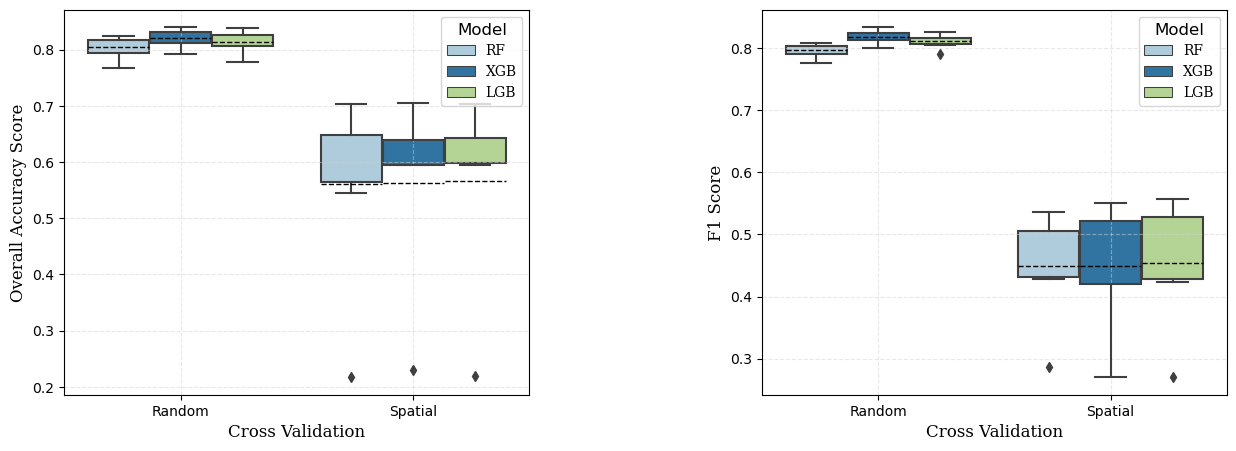

In [101]:
# Reorganizing the data for the box plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for Overall Accuracy and F1 Score for Random and Spatial Cross-validation
overall_accuracy = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6'],
    'RF': [0.768, 0.790, 0.810, 0.820, 0.811, 0.825],
    'XGB': [0.792, 0.810, 0.815, 0.840, 0.832, 0.832],
    'LGB': [0.778, 0.805, 0.810, 0.829, 0.818, 0.838]
}

f1_score = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6'],
    'RF': [0.777, 0.788, 0.804, 0.804, 0.801, 0.808],
    'XGB': [0.801, 0.811, 0.818, 0.834, 0.827, 0.819],
    'LGB': [0.791, 0.805, 0.813, 0.813, 0.818, 0.826]
}

# Data for Spatial Cross-validation
spatial_accuracy = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6'],
    'RF': [0.657, 0.217, 0.703, 0.624, 0.545, 0.624],
    'XGB': [0.651, 0.230, 0.705, 0.604, 0.595, 0.595],
    'LGB': [0.650, 0.219, 0.703, 0.620, 0.595, 0.608]
}

spatial_f1_score = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6'],
    'RF': [0.442, 0.287, 0.536, 0.429, 0.497, 0.508],
    'XGB': [0.445, 0.270, 0.551, 0.413, 0.535, 0.485],
    'LGB': [0.443, 0.271, 0.557, 0.423, 0.540, 0.494]
}

# Create DataFrames for both Overall Accuracy and F1 Score for Random and Spatial Cross-validation
df_accuracy = pd.DataFrame(overall_accuracy)
df_accuracy['Metric'] = 'Overall Accuracy Score'
df_accuracy = df_accuracy.melt(id_vars=['Fold', 'Metric'], value_vars=['RF', 'XGB', 'LGB'], 
                                var_name='Model', value_name='Val')

df_f1 = pd.DataFrame(f1_score)
df_f1['Metric'] = 'F1 Score'
df_f1 = df_f1.melt(id_vars=['Fold', 'Metric'], value_vars=['RF', 'XGB', 'LGB'], 
                   var_name='Model', value_name='Val')

df_spatial_accuracy = pd.DataFrame(spatial_accuracy)
df_spatial_accuracy['Metric'] = 'Overall Accuracy Score'
df_spatial_accuracy = df_spatial_accuracy.melt(id_vars=['Fold', 'Metric'], value_vars=['RF', 'XGB', 'LGB'], 
                                               var_name='Model', value_name='Val')

df_spatial_f1 = pd.DataFrame(spatial_f1_score)
df_spatial_f1['Metric'] = 'F1 Score'
df_spatial_f1 = df_spatial_f1.melt(id_vars=['Fold', 'Metric'], value_vars=['RF', 'XGB', 'LGB'], 
                                   var_name='Model', value_name='Val')

# Add 'CV' column to specify cross-validation type
df_accuracy['CV'] = 'Random'
df_f1['CV'] = 'Random'

# Add 'CV' column for spatial cross-validation
df_spatial_accuracy['CV'] = 'Spatial'
df_spatial_f1['CV'] = 'Spatial'

# Combine all data
#metric_df = pd.concat([df_accuracy, df_f1, df_spatial_accuracy, df_spatial_f1])

# Set a more visually appealing color palette
#custom_palette = sns.color_palette("Paired", n_colors=len(metric_df['Model'].unique()))

# Create subplots without sharing the y-axis
fig, ax = plt.subplots(1, len(metric_df['Metric'].unique()), figsize=(15, 5))

# Define y-axis labels for each subplot
y_labels = ['Overall Accuracy Score', 'F1 Score']

# Loop through unique metrics
for i, metric in enumerate(metric_df['Metric'].unique()):
    sns.boxplot(
        data=metric_df[metric_df['Metric'] == metric],
        x='CV', y='Val', hue='Model', ax=ax[i], palette=custom_palette,
        showmeans=True, meanline=True, 
        meanprops={'color': 'black', 'linewidth': 1},  # Black line for the mean
        medianprops={'color': 'none'}  # Remove the black median line
    )
    
    # Customize each subplot
    ax[i].grid(True, linestyle='--', alpha=0.5, color='lightgray')  # Adjust grid appearance
    ax[i].set_xlabel('Cross Validation', fontsize=12, fontfamily='serif')
    ax[i].set_ylabel(y_labels[i], fontsize=12, fontfamily='serif')
    ax[i].legend(title='Model', title_fontsize='12', loc='upper right', prop={'family': 'serif'})

# Adjust the white space between subplots
plt.subplots_adjust(wspace=0.5)

# Save the plot before calling plt.show()
plt.savefig('C:/Users/Manager/Desktop/Satya/Objective 1 Results/New output/Boxplot.png', bbox_inches='tight', dpi=1200)
# Show the plot
plt.show()


In [115]:
ac_df.groupby(['CV', 'Model'])[['Val']].aggregate(['mean'])

Val
                   mean
CV      Model          
Random  LGB    0.812880
        RF     0.804069
        XGB    0.820223
Spatial LGB    0.635258
        RF     0.630650
        XGB    0.630066

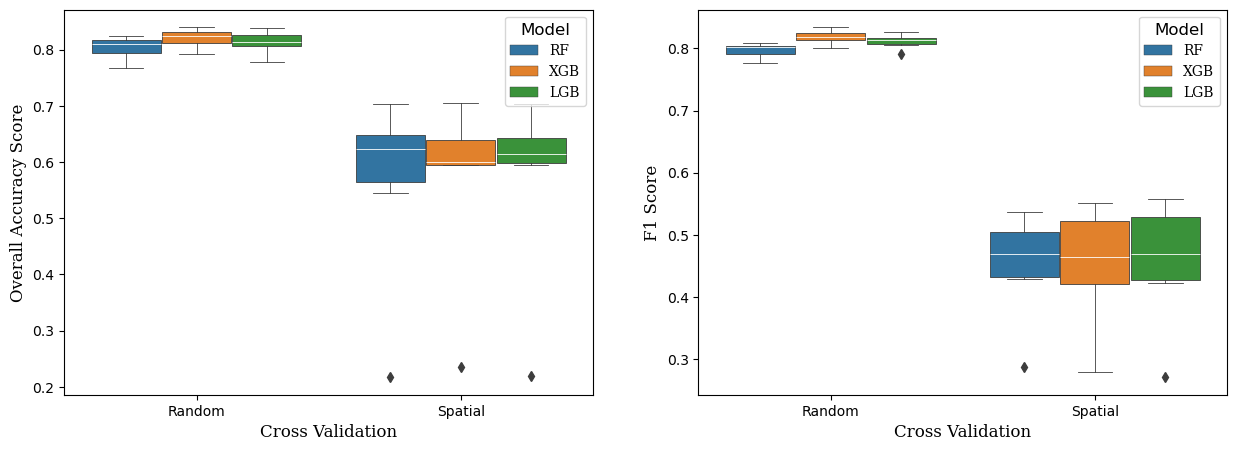

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for Overall Accuracy and F1 Score for Random and Spatial Cross-validation
overall_accuracy_random = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6'],
    'RF': [0.768, 0.790, 0.810, 0.820, 0.811, 0.825],
    'XGB': [0.792, 0.810, 0.815, 0.840, 0.832, 0.832],
    'LGB': [0.778, 0.805, 0.810, 0.829, 0.818, 0.838]
}

spatial_accuracy = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6'],
    'RF': [0.657, 0.217, 0.703, 0.624, 0.545, 0.624],
    'XGB': [0.651, 0.235, 0.705, 0.604, 0.595, 0.595],
    'LGB': [0.650, 0.219, 0.703, 0.620, 0.595, 0.608]
}

f1_score_random = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6'],
    'RF': [0.777, 0.788, 0.804, 0.804, 0.801, 0.808],
    'XGB': [0.801, 0.811, 0.818, 0.834, 0.827, 0.819],
    'LGB': [0.791, 0.805, 0.813, 0.813, 0.818, 0.826]
}

spatial_f1_score = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6'],
    'RF': [0.442, 0.287, 0.536, 0.429, 0.497, 0.508],
    'XGB': [0.445, 0.280, 0.551, 0.413, 0.535, 0.485],
    'LGB': [0.443, 0.271, 0.557, 0.423, 0.540, 0.494]
}

# Convert to DataFrames for plotting
df_accuracy_random = pd.DataFrame(overall_accuracy_random)
df_accuracy_random['Metric'] = 'Overall Accuracy Score'
df_accuracy_random = df_accuracy_random.melt(id_vars=['Fold', 'Metric'], value_vars=['RF', 'XGB', 'LGB'], 
                                              var_name='Model', value_name='Val')

df_f1_random = pd.DataFrame(f1_score_random)
df_f1_random['Metric'] = 'F1 Score'
df_f1_random = df_f1_random.melt(id_vars=['Fold', 'Metric'], value_vars=['RF', 'XGB', 'LGB'], 
                                  var_name='Model', value_name='Val')

df_accuracy_spatial = pd.DataFrame(spatial_accuracy)
df_accuracy_spatial['Metric'] = 'Overall Accuracy Score'
df_accuracy_spatial = df_accuracy_spatial.melt(id_vars=['Fold', 'Metric'], value_vars=['RF', 'XGB', 'LGB'], 
                                               var_name='Model', value_name='Val')

df_f1_spatial = pd.DataFrame(spatial_f1_score)
df_f1_spatial['Metric'] = 'F1 Score'
df_f1_spatial = df_f1_spatial.melt(id_vars=['Fold', 'Metric'], value_vars=['RF', 'XGB', 'LGB'], 
                                    var_name='Model', value_name='Val')

# Add 'CV' column for Cross-validation type
df_accuracy_random['CV'] = 'Random'
df_f1_random['CV'] = 'Random'

df_accuracy_spatial['CV'] = 'Spatial'
df_f1_spatial['CV'] = 'Spatial'

# Combine all data for plotting
metric_df = pd.concat([df_accuracy_random, df_f1_random, df_accuracy_spatial, df_f1_spatial])

# Set a more visually appealing color palette
#custom_palette = sns.color_palette("Paired", n_colors=len(metric_df['Model'].unique()))
custom_palette = sns.color_palette(n_colors=len(metric_df['Model'].unique()))

# Create subplots without sharing the y-axis
fig, ax = plt.subplots(1, len(metric_df['Metric'].unique()), figsize=(15, 5))

# Define y-axis labels for each subplot
y_labels = ['Overall Accuracy Score', 'F1 Score']

# Loop through unique metrics and plot
for i, metric in enumerate(metric_df['Metric'].unique()):
    sns.boxplot(
        data=metric_df[metric_df['Metric'] == metric],
        x='CV', y='Val', hue='Model', ax=ax[i], palette=custom_palette, linewidth=0.6,
        # showmeans=True, meanline=True, 
        #meanprops={'color': 'black', 'linewidth': 1},  # Black line for the mean
        medianprops={'color': 'white'}  # Remove the black median line
    )
    
    # Customize each subplot
    #ax[i].grid(None, linestyle='--', alpha=0.3, color='lightgray')  # Adjust grid appearance
    ax[i].set_xlabel('Cross Validation', fontsize=12, fontfamily='serif')
    ax[i].set_ylabel(y_labels[i], fontsize=12, fontfamily='serif')
    ax[i].legend(title='Model', title_fontsize='12', loc='upper right', prop={'family': 'serif'})
    plt.gca().set_aspect('auto', adjustable='box')  # Adjust aspect ratio

# Adjust the white space between subplots
plt.subplots_adjust(wspace=0.2)

# Save the plot before calling plt.show()
plt.savefig('C:/Users/Manager/Desktop/Satya/Objective 1 Results/New output/Boxplot.png', bbox_inches='tight', dpi=2000)

# Show the plot
plt.show()


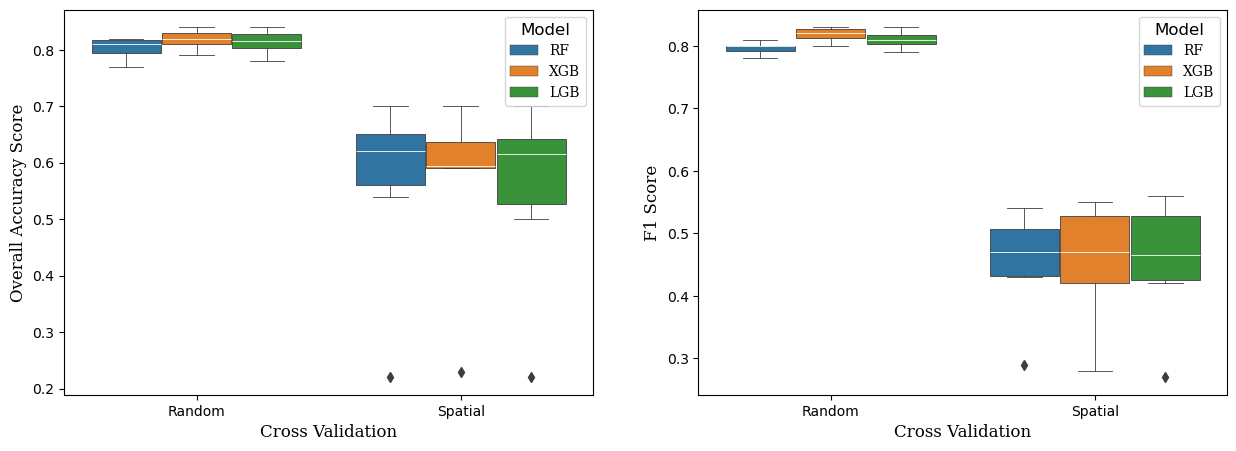

In [418]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for Overall Accuracy and F1 Score for Random and Spatial Cross-validation
overall_accuracy_random = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6'],
    'RF': [0.77, 0.79, 0.81, 0.82, 0.81, 0.82],
    'XGB': [0.79, 0.81, 0.81, 0.84, 0.83, 0.83],
    'LGB': [0.78, 0.80, 0.81, 0.83, 0.82, 0.84]
}

spatial_accuracy = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6'],
    'RF': [0.66, 0.22, 0.70, 0.62, 0.54, 0.62],
    'XGB': [0.65, 0.23, 0.70, 0.60, 0.59, 0.59],
    'LGB': [0.65, 0.22, 0.70, 0.62, 0.50, 0.61]
}

f1_score_random = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6'],
    'RF': [0.78, 0.789, 0.80, 0.80, 0.80, 0.81],
    'XGB': [0.80, 0.81, 0.82, 0.83, 0.83, 0.82],
    'LGB': [0.79, 0.80, 0.81, 0.81, 0.82, 0.83]
}

spatial_f1_score = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6'],
    'RF': [0.44, 0.29, 0.54, 0.43, 0.50, 0.51],
    'XGB': [0.45, 0.28, 0.55, 0.41, 0.54, 0.49],
    'LGB': [0.44, 0.27, 0.56, 0.42, 0.54, 0.49]
}

# Convert to DataFrames for plotting
df_accuracy_random = pd.DataFrame(overall_accuracy_random)
df_accuracy_random['Metric'] = 'Overall Accuracy Score'
df_accuracy_random = df_accuracy_random.melt(id_vars=['Fold', 'Metric'], value_vars=['RF', 'XGB', 'LGB'], 
                                              var_name='Model', value_name='Val')

df_f1_random = pd.DataFrame(f1_score_random)
df_f1_random['Metric'] = 'F1 Score'
df_f1_random = df_f1_random.melt(id_vars=['Fold', 'Metric'], value_vars=['RF', 'XGB', 'LGB'], 
                                  var_name='Model', value_name='Val')

df_accuracy_spatial = pd.DataFrame(spatial_accuracy)
df_accuracy_spatial['Metric'] = 'Overall Accuracy Score'
df_accuracy_spatial = df_accuracy_spatial.melt(id_vars=['Fold', 'Metric'], value_vars=['RF', 'XGB', 'LGB'], 
                                               var_name='Model', value_name='Val')

df_f1_spatial = pd.DataFrame(spatial_f1_score)
df_f1_spatial['Metric'] = 'F1 Score'
df_f1_spatial = df_f1_spatial.melt(id_vars=['Fold', 'Metric'], value_vars=['RF', 'XGB', 'LGB'], 
                                    var_name='Model', value_name='Val')

# Add 'CV' column for Cross-validation type
df_accuracy_random['CV'] = 'Random'
df_f1_random['CV'] = 'Random'

df_accuracy_spatial['CV'] = 'Spatial'
df_f1_spatial['CV'] = 'Spatial'

# Combine all data for plotting
metric_df = pd.concat([df_accuracy_random, df_f1_random, df_accuracy_spatial, df_f1_spatial])

# Set a more visually appealing color palette
#custom_palette = sns.color_palette("Paired", n_colors=len(metric_df['Model'].unique()))
custom_palette = sns.color_palette(n_colors=len(metric_df['Model'].unique()))

# Create subplots without sharing the y-axis
fig, ax = plt.subplots(1, len(metric_df['Metric'].unique()), figsize=(15, 5))

# Define y-axis labels for each subplot
y_labels = ['Overall Accuracy Score', 'F1 Score']

# Loop through unique metrics and plot
for i, metric in enumerate(metric_df['Metric'].unique()):
    sns.boxplot(
        data=metric_df[metric_df['Metric'] == metric],
        x='CV', y='Val', hue='Model', ax=ax[i], palette=custom_palette, linewidth=0.6,
        # showmeans=True, meanline=True, 
        #meanprops={'color': 'black', 'linewidth': 1},  # Black line for the mean
        medianprops={'color': 'white'}  # Remove the black median line
    )
    
    # Customize each subplot
    #ax[i].grid(None, linestyle='--', alpha=0.3, color='lightgray')  # Adjust grid appearance
    ax[i].set_xlabel('Cross Validation', fontsize=12, fontfamily='serif')
    ax[i].set_ylabel(y_labels[i], fontsize=12, fontfamily='serif')
    ax[i].legend(title='Model', title_fontsize='12', loc='upper right', prop={'family': 'serif'})
    plt.gca().set_aspect('auto', adjustable='box')  # Adjust aspect ratio

# Adjust the white space between subplots
plt.subplots_adjust(wspace=0.2)

# Save the plot before calling plt.show()
plt.savefig('C:/Users/Manager/Desktop/Satya/Objective 1 Results/New output/Boxplot_21NOV.png', bbox_inches='tight', dpi=2000)

# Show the plot
plt.show()


In [ ]:
ac_df.groupby(['CV', 'Model'])[['Val']].aggregate(['mean'])

### F1-Score (Macro)

In [51]:
f1_df.groupby(['CV', 'Model'])[['Val']].aggregate(['mean'])

Val
                   mean
CV      Model          
Random  LGB    0.810977
        RF     0.796812
        XGB    0.818468
Spatial LGB    0.491396
        RF     0.482351
        XGB    0.485834

In [389]:
RF_F1 = [0.44, 0.29, 0.54, 0.43, 0.50, 0.51]
XGB_F1 = [0.45, 0.28, 0.55, 0.41, 0.54, 0.49]
LGB_F1 = [0.44, 0.27, 0.56, 0.42, 0.54, 0.49]

In [390]:
import statistics
statistics.median(RF_F1)

0.47

In [391]:
import statistics
statistics.median(XGB_F1)

0.47

In [392]:
import statistics
statistics.median(LGB_F1)

0.46499999999999997